# Calculating band indices

**Notebook currently compatible with the `DEA Sandbox` environment only**

### Background
Remote sensing indices are combinations of spectral bands used to highlight features in the data and the underlying landscape. 


### Description
 This notebook shows you how to:
 - calculate an index manually
 - calculate an index using the function `dea_bandindces.py`

### Technical details
* **Products used:** [`ga_ls8c_ard_3`](https://explorer.sandbox.dea.ga.gov.au/ga_ls8c_ard_3/2016)
* **Analyses used:** NDVI

## Getting started
To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Use standard import commands; some are shown below. 
Begin with any `iPython` magic commands, followed by standard Python packages, then any additional functionality you need from the `Scripts` directory.

In [1]:
%matplotlib inline


import datacube
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import sys
import xarray as xr

sys.path.append("../Scripts")
from dea_datahandling import load_ard
import dea_plotting
import dea_bandindices

### Connect to the datacube
Give your datacube app a unique name that is consistent with the purpose of the notebook.

In [2]:
dc = datacube.Datacube(app="DEA_notebooks_indices")

## Create a query and get some satellite data
We're loading in landsat 8 data for an area

In [3]:
# Create a reusable query
query = {
    'x': (153.40, 153.50),
    'y': (-27.50, -27.60),
    'time': ('2017-06', '2018-06'),
    'measurements': [
        'nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1',
        'nbart_swir_2'
    ],
    'output_crs': 'EPSG:3577',
    'resolution': (-30, 30),
    'group_by': 'solar_day'
}

# Load available data from Landsat 8 and filter to retain only times with at least 99% good data
ds = load_ard(dc=dc, products=['ga_ls8c_ard_3'], min_gooddata=0.99, **query)


Loading ga_ls8c_ard_3 data
    Filtering to 7 out of 25 observations
    Applying pixel quality mask
Combining and sorting data
    Masking out invalid values
    Returning 7 observations 


### Plot the first image to see what our area looks like
Use subheadings to break up steps within a single section.

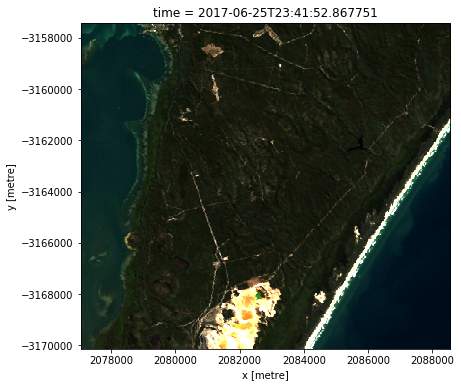

In [4]:
#use the dea_plotting function to look at an rgb plot of our area
dea_plotting.rgb(ds, index=0)


## Let's calculate an index for this area manually
The formula for NDVI is \begin{align}
Normalised\ Difference\ Vegetation\ Index &= \frac{NIR-RED}{NIR+RED} \\
\end{align}

In [5]:
#calculate NDVI using the formula above. NDVI is a commonly used vegetation index.
ds['ndvi'] = (ds.nbart_nir - ds.nbart_red) / (ds.nbart_nir + ds.nbart_red)


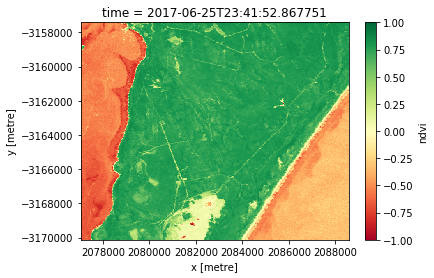

In [6]:
#plot the results to see what they look like:
ds.ndvi.isel(time=0).plot(vmin=-1, vmax=1, cmap='RdYlGn')


In the image above, vegetation shows up as green (NDVI >0). 
Sand shows up as yellow (NDVI~0) and water shows up as red (NDVI <1)

## Now let's calculate an index for the same area using the `dea_bandindices` function:

The `dea_bandindices` function can calculate these indices:

- **AWEI_ns** (Automated Water Extraction Index,no shadows, Feyisa 2014)
- **AWEI_sh** (Automated Water Extraction Index,shadows, Feyisa 2014)
- **BAEI**    (Built-Up Area Extraction Index, Bouzekri et al. 2015) 
- **BAI**     (Burn Area Index, Martin 1998)
- **BSI**     (Bare Soil Index, Rikimaru et al. 2002)
- **BUI**     (Built-Up Index, He et al. 2010)
- **CMR**     (Clay Minerals Ratio, Drury 1987)
- **EVI**     (Enhanced Vegetation Index, Huete 2002)
- **FMR**     (Ferrous Minerals Ratio, Segal 1982)
- **IOR**     (Iron Oxide Ratio, Segal 1982)  
- **LAI**     (Leaf Area Index, Boegh 2002)
- **MNDWI**   (Modified Normalised Difference Water Index, Xu 1996) 
- **MSAVI**   (Modified Soil Adjusted Vegetation Index, Qi et al. 1994)              
- **NBI**     (New Built-Up Index, Jieli et al. 2010)
- **NBR**     (Normalised Burn Ratio, Lopez Garcia 1991)
- **NDBI**    (Normalised Difference Built-Up Index, Zha 2003)
- **NDCI**    (Normalised Difference Chlorophyll Index, Mishra & Mishra, 2012)
- **NDMI**    (Normalised Difference Moisture Index, Gao 1996)        
- **NDSI**    (Normalised Difference Snow Index, Hall 1995)
- **NDVI**    (Normalised Difference Vegetation Index, Rouse 1973)
- **NDWI**    (Normalised Difference Water Index, McFeeters 1996)
- **SAVI**    (Soil Adjusted Vegetation Index, Huete 1988)
- **TCB**     (Tasseled Cap Brightness, Crist 1985)
- **TCG**     (Tasseled Cap Greeness, Crist 1985)
- **TCW**     (Tasseled Cap Wetness, Crist 1985)
- **WI**      (Water Index, Fisher 2016) 

### Using the `dea_bandindices.calculate_indices` function, we get the same result:

In [7]:
#Calculate NDVI using `calculate indices`
NDVI = dea_bandindices.calculate_indices(ds, index='NDVI', collection='ga_ls_3')


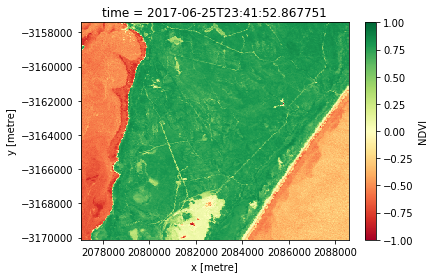

In [8]:
NDVI.NDVI.isel(time=0).plot(vmin=-1, vmax=1, cmap='RdYlGn')


## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** October 2019

**Compatible `datacube` version:** 1.7+43.gc873f3ea.dirty

## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)